<a href="https://colab.research.google.com/github/jtamas0705/learnpytorch/blob/main/01_pytorch_workflows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Exercises***  

For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).  

In [1]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

1. Create a straight line dataset using the linear regression formula (weight * X + bias).

* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [2]:
import matplotlib.pyplot as plt

torch.manual_seed(502)
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.02
device = "cuda" if torch.cuda.is_available() else "cpu"
X = torch.arange(start, end, step, device=device).unsqueeze(dim=1)
split_data = int(0.8 * len(X))
X_train = X[:split_data]
X_test = X[split_data:]
y_train = weight * X_train + bias
y_test = weight * X_test + bias

2. Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().  

Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [3]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = torch.nn.Linear(
            in_features=1,
            out_features=1
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

model = LinearRegressionModel().to(device)
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5912]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9839], device='cuda:0'))])

3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [4]:
loss_fn = torch.nn.L1Loss()
optim = torch.optim.SGD(params=model.parameters(), lr=0.01)

EPOCHS = 300

for epoch in range(EPOCHS):
  model.train()

  # Forward path
  y_pred = model(X_train)

  # Calculate loss
  loss = loss_fn(y_pred, y_train)

  # Init grads for optimization
  optim.zero_grad()

  # Backport propagation
  loss.backward()

  # Run optimization on weights
  optim.step()

  if epoch % 20 == 0:
    model.eval()
    with torch.inference_mode():
      y_test_pred = model(X_test)
      test_loss = loss_fn(y_test_pred, y_test)

      print(f"Epoch: {epoch} | test loss: {test_loss}")

Epoch: 0 | test loss: 0.3296287953853607
Epoch: 20 | test loss: 0.12375376373529434
Epoch: 40 | test loss: 0.08364827930927277
Epoch: 60 | test loss: 0.06572985649108887
Epoch: 80 | test loss: 0.04987196996808052
Epoch: 100 | test loss: 0.03332724794745445
Epoch: 120 | test loss: 0.017469370737671852
Epoch: 140 | test loss: 0.0005500912666320801
Epoch: 160 | test loss: 0.0005500912666320801
Epoch: 180 | test loss: 0.0005500912666320801
Epoch: 200 | test loss: 0.0005500912666320801
Epoch: 220 | test loss: 0.0005500912666320801
Epoch: 240 | test loss: 0.0005500912666320801
Epoch: 260 | test loss: 0.0005500912666320801
Epoch: 280 | test loss: 0.0005500912666320801


4. Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

X_train: 40
X_test: 10
y_train: 40
y_test: 10


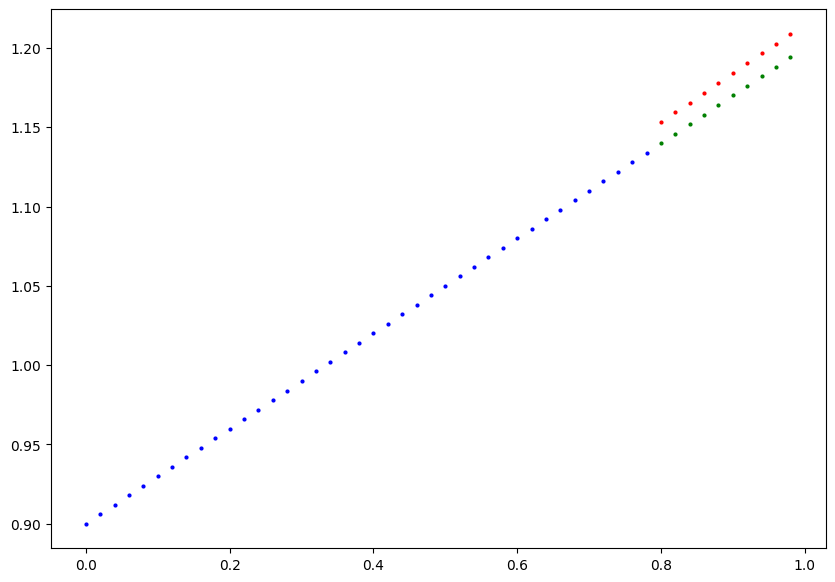

In [5]:
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")

preds = model(X_test)

plt.figure(figsize=(10, 7))

plt.scatter(X_train.to("cpu").numpy(), y_train.to("cpu").numpy(), c="b", s=4, label="Training Data")
plt.scatter(X_test.to("cpu").numpy(), y_test.to("cpu").numpy(), c="g", s=4, label="Test Data")

plt.scatter(X_test.to("cpu").numpy(), preds.to("cpu").detach().numpy(), c="r", s=4, label="Prediction Test Data")

5. Save your trained model's state_dict() to file.
* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [6]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_NAME = "linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

if Path(MODEL_PATH).is_dir():
  print(f"{MODEL_PATH} directory exists")
else:
  Path(MODEL_PATH).mkdir(parents=True, exist_ok=True)

torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

model_new = LinearRegressionModel().to(device)
model_new.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
model_new.eval()

with torch.inference_mode():
  preds_new = model_new(X_test)
  print(f"{preds == preds_new}")



models directory exists
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')
